In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
north_america = pd.read_csv("/content/north_america.csv")

In [3]:
north_america['brand_name'].fillna('unknown', inplace=True)
north_america['type_product'].fillna('unknown', inplace=True)
north_america['type_material'].fillna('unknown', inplace=True)
north_america['layer'].fillna('unknown', inplace=True)
north_america['layer'].replace('unsure', 'unknown', inplace=True)
north_america['city'].fillna('unknown', inplace=True)
north_america['province'].fillna('unknown', inplace=True)
north_america['specifics_of_audit'].fillna('unknown', inplace=True)
north_america['total_count'].fillna(north_america['total_count'].mean(), inplace=True)

In [4]:
north_america_data1 = north_america[['total_count']].rename(columns={'total_count': 'Total Count'})
north_america_data2 = north_america[['brand_name', 'parent_company_name', 'year', 'type_product', 'type_material', 'layer', 'city', 'province', 'specifics_of_audit', 'total_count']].copy()
north_america_data2.columns = ['Brand Name', 'Parent Company', 'Year', 'Product Type', 'Material Type', 'Layer', 'City', 'Province', 'Specifics of Audit', 'Total Count']

# Select top 5 most frequent values in the 'City' column
city_frequency = north_america_data2['City'].value_counts().nlargest(5)

In [5]:
province_mapping = {
    'alabama': 'al',
    'alaska': 'ak',
    'california': 'ca',
    'califonia': 'ca',
    'colorado': 'co',
    'district of columbia': 'dc',
    'florida': 'fl',
    'hawaii': 'hi',
    'louisiana': 'la',
    'maryland': 'md',
    'massachusetts': 'ma',
    'missouri': 'mo',
    'new york': 'ny',
    'north carolina': 'nc',
    'ohio': 'oh',
    'west virginia': 'wv',
    'wisconsin': 'wi',
    'virginia': 'va',
    'd.c.': 'wa',
    'morelos': 'mr',
    'georgia': 'ga',
    'roatan, bay islands': 'bay islands',
    'bay islands/ roatan': 'bay islands',
    'quintana roo': 'q.r.',
    'la paz': 'bo',
    'british columbia': 'b.c.',
    'mahahual': 'q.r.',
    'nuevo leãƒâ³n': 'n.l.',
    'nuevo leã³n': 'n.l.',
    'veracruz': 'ver',
    'mexico city': 'cdmx',
    'coahuila': 'ch',
    'seabright sb': 'sb',
    'michoacan': 'mich.',
    'mayaguez': 'pr',
    'san luis potosi': 's.l.p.',
    'santa ana': 'ca',
    'st. croix': 'vi'
}

In [6]:
north_america_data2['Province'] = north_america_data2['Province'].str.lower().replace(province_mapping)


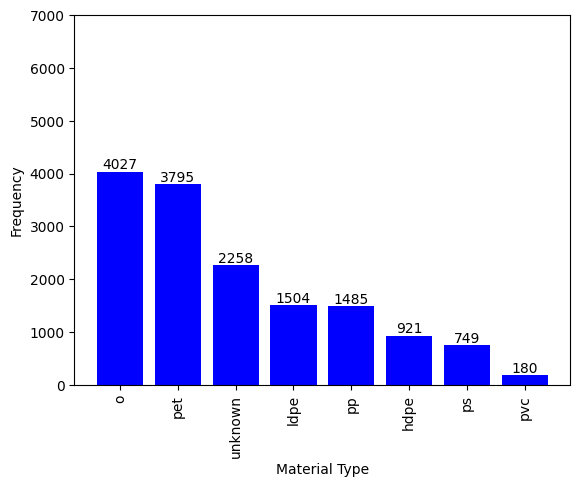

In [7]:
material_type_frequency = north_america_data2['Material Type'].value_counts()

# Create a bar plot
plt.bar(material_type_frequency.index, material_type_frequency.values, color='blue')

# Set the y-axis limit
plt.ylim(0, 7000)

# Add text labels to the bars
for i, v in enumerate(material_type_frequency.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Add titles to the axes
plt.xlabel('Material Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [8]:
north_america_data2

,Brand Name,Parent Company,Year,Product Type,Material Type,Layer,City,Province,Specifics of Audit,Total Count
0,?,suntory,2020,food packaging,pp,single-layer,san diego,ca,coastal,16
1,?,suntory,2020,household products,o,single-layer,san diego,ca,coastal,1
2,?,suntory,2020,household products,o,single-layer,san diego,ca,coastal,1
3,?,suntory,2020,smoking materials,o,unknown,san diego,ca,coastal,11
4,?,suntory,2020,personal care,o,unknown,san diego,ca,coastal,1
...,...,...,...,...,...,...,...,...,...,...
14914,zwan,"zwan, zwan",2020,food packaging,pp,single-layer,monterrey,n.l.,inland,1
14915,zyn,swedish match,2021,smoking materials,o,multi-layer,sausalito,ca,coastal,1
14916,zyn,swedish match,2021,smoking materials,pp,single-layer,waverly,mo,freshwater,2
14917,zyn,swedish match,2021,smoking materials,o,multi-layer,los alamitos,ca,freshwater,1


In [ ]:
from sklearn.model_selection import train_test_split

# Create dummy variables
north_america_data2['pepsico'] = (north_america_data2['Parent Company'] == 'pepsico').astype(int)
north_america_data2['nestlé'] = (north_america_data2['Parent Company'] == 'nestlé').astype(int)
north_america_data2['coca_cola'] = (north_america_data2['Parent Company'] == 'the coca-cola company').astype(int)
north_america_data2['other_company'] = (~(north_america_data2['Parent Company'].isin(['pepsico', 'nestlé', 'the coca-cola company']))).astype(int)

north_america_data2['gatorade'] = (north_america_data2['Brand Name'] == 'gatorade').astype(int)
north_america_data2['starbucks'] = (north_america_data2['Brand Name'] == 'starbucks').astype(int)
north_america_data2['mcdonalds'] = (north_america_data2['Brand Name'] == 'mcdonalds').astype(int)

north_america_data2['ca'] = (north_america_data2['Province'] == 'ca').astype(int)
north_america_data2['va'] = (north_america_data2['Province'] == 'va').astype(int)
north_america_data2['fl'] = (north_america_data2['Province'] == 'fl').astype(int)
north_america_data2['other_state'] = (~(north_america_data2['Province'].isin(['ca', 'va', 'fl']))).astype(int)

north_america_data2['alexandria'] = (north_america_data2['City'] == 'alexandria').astype(int)
north_america_data2['milwaukee'] = (north_america_data2['City'] == 'milwaukee').astype(int)
north_america_data2['fairhaven'] = (north_america_data2['City'] == 'fairhaven').astype(int)
north_america_data2['other_city'] = (~(north_america_data2['City'].isin(['alexandria', 'milwaukee', 'fairhaven']))).astype(int)

north_america_data2['fishing_gear'] = (north_america_data2['Product Type'] == 'fishing gear').astype(int)
north_america_data2['food_pakaging'] = (north_america_data2['Product Type'] == 'food packaging').astype(int)
north_america_data2['household_products'] = (north_america_data2['Product Type'] == 'household products').astype(int)
north_america_data2['other'] = (north_america_data2['Product Type'] == 'other').astype(int)
north_america_data2['packaging_material'] = (north_america_data2['Product Type'] == 'packaging materials').astype(int)
north_america_data2['personal_care'] = (north_america_data2['Product Type'] == 'personal care').astype(int)
north_america_data2['smoking_materials'] = (north_america_data2['Product Type'] == 'smoking materials').astype(int)

north_america_data2

,Brand Name,Parent Company,Year,Product Type,Material Type,Layer,City,Province,Specifics of Audit,Total Count,...,milwaukee,fairhaven,other_city,fishing_gear,food_pakaging,household_products,other,packaging_material,personal_care,smoking_materials
0,?,suntory,2020,food packaging,pp,single-layer,san diego,ca,coastal,16,...,0,0,1,0,1,0,0,0,0,0
1,?,suntory,2020,household products,o,single-layer,san diego,ca,coastal,1,...,0,0,1,0,0,1,0,0,0,0
2,?,suntory,2020,household products,o,single-layer,san diego,ca,coastal,1,...,0,0,1,0,0,1,0,0,0,0
3,?,suntory,2020,smoking materials,o,unknown,san diego,ca,coastal,11,...,0,0,1,0,0,0,0,0,0,1
4,?,suntory,2020,personal care,o,unknown,san diego,ca,coastal,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14914,zwan,"zwan, zwan",2020,food packaging,pp,single-layer,monterrey,n.l.,inland,1,...,0,0,1,0,1,0,0,0,0,0
14915,zyn,swedish match,2021,smoking materials,o,multi-layer,sausalito,ca,coastal,1,...,0,0,1,0,0,0,0,0,0,1
14916,zyn,swedish match,2021,smoking materials,pp,single-layer,waverly,mo,freshwater,2,...,0,0,1,0,0,0,0,0,0,1
14917,zyn,swedish match,2021,smoking materials,o,multi-layer,los alamitos,ca,freshwater,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
correlation_matrix = north_america_data2.corr()
print(correlation_matrix)

                        Year  Total Count   pepsico    nestlé  coca_cola  \
Year                1.000000    -0.012967 -0.030953 -0.040496  -0.005352   
Total Count        -0.012967     1.000000 -0.006172  0.000272   0.008824   
pepsico            -0.030953    -0.006172  1.000000 -0.043531  -0.060754   
nestlé             -0.040496     0.000272 -0.043531  1.000000  -0.036970   
coca_cola          -0.005352     0.008824 -0.060754 -0.036970   1.000000   
other_company       0.043889    -0.001172 -0.658446 -0.400677  -0.559200   
gatorade           -0.015195    -0.002397  0.384337 -0.016731  -0.023350   
starbucks           0.001345    -0.004863 -0.025463 -0.015495  -0.021625   
mcdonalds          -0.010991    -0.005445 -0.022733 -0.013833  -0.019306   
ca                 -0.064207    -0.001974 -0.006218  0.002925  -0.045777   
va                  0.165157     0.001525 -0.017577  0.001754  -0.011220   
fl                  0.095915    -0.013453 -0.009879  0.003633  -0.009727   
other_state 

<ipython-input-33-7ab6f37b07ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = north_america_data2.corr()


In [ ]:
selected_columns = ['Product Type', 'Material Type', 'Layer', 'City', 'Province', 'Total Count']


In [ ]:
df = north_america_data2[selected_columns]
df = pd.get_dummies(df, drop_first=True)
df = sm.add_constant(df)

NameError: ignored

In [ ]:
df

,Total Count,Product Type_food packaging,Product Type_household products,Product Type_other,Product Type_packaging materials,Product Type_personal care,Product Type_smoking materials,Product Type_unknown,Material Type_ldpe,Material Type_o,...,Province_utah,Province_va,Province_ver,Province_vi,Province_vt,Province_wa,Province_waddell creek beach,Province_wi,Province_wv,Province_zmudowski beach
0,16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14914,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14915,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14916,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14917,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
threshold = 10

# Create a new binary column indicating the presence of plastic waste
df['Plastic Waste'] = np.where(df['Total Count'] > threshold, 1, 0)

In [ ]:
variables = [
    'Product Type_food packaging',
    'Product Type_household products',
    'Product Type_packaging materials',
    'Product Type_personal care',
    'Product Type_smoking materials'
]

In [ ]:
target = 'Plastic Waste'

In [ ]:
X = df[variables]
y = df[target]


In [ ]:
X = sm.add_constant(X)

NameError: ignored

In [ ]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.296015
         Iterations 7


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          Plastic Waste   No. Observations:                14919
Model:                          Logit   Df Residuals:                    14913
Method:                           MLE   Df Model:                            5
Date:                Thu, 15 Jun 2023   Pseudo R-squ.:                0.003723
Time:                        04:46:42   Log-Likelihood:                -4416.3
converged:                       True   LL-Null:                       -4432.8
Covariance Type:            nonrobust   LLR p-value:                 3.748e-06
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2594      0.043    -52.707      0.000      -2.343      -2.175
Product Type_food packaging         -0.1624      0.063     -2.598

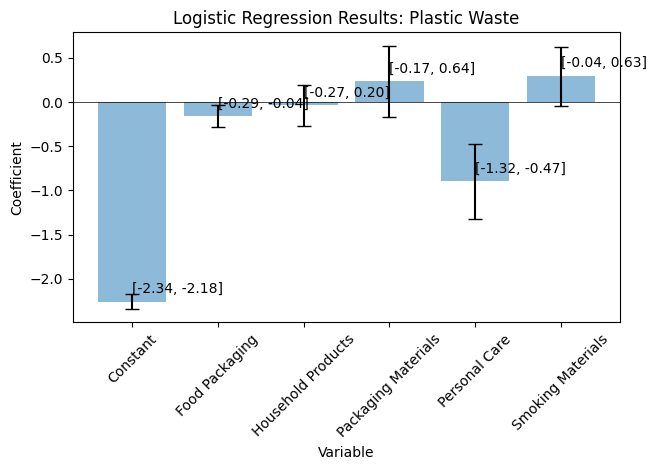

In [ ]:
coefficients = [-2.2594, -0.1624, -0.0386, 0.2350, -0.8985, 0.2933]
std_errors = [0.043, 0.063, 0.120, 0.206, 0.217, 0.170]
labels = ['Constant', 'Food Packaging', 'Household Products', 'Packaging Materials', 'Personal Care', 'Smoking Materials']

# Calculate confidence intervals
lower_bound = np.array(coefficients) - 1.96 * np.array(std_errors)
upper_bound = np.array(coefficients) + 1.96 * np.array(std_errors)

# Create bar plot
fig, ax = plt.subplots()
ax.bar(labels, coefficients, yerr=1.96*np.array(std_errors), align='center', alpha=0.5, capsize=5)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.set_ylabel('Coefficient')
ax.set_xlabel('Variable')
ax.set_title('Logistic Regression Results: Plastic Waste')
plt.xticks(rotation=45)
plt.tight_layout()

# Add confidence intervals
for i, label in enumerate(labels):
    ax.annotate(f'[{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]', (i, coefficients[i] + 0.1))

# Show plot
plt.show()

In [12]:
X = north_america_data2.drop('Total Count', axis=1)
y = north_america_data2['Total Count']

In [15]:
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)


In [16]:
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8445.92785604624


In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 8445.92785604624


In [20]:
import graphviz
from sklearn import tree

# Select one of the trees from the random forest
tree_idx = 0
selected_tree = rf_model.estimators_[tree_idx]

# Generate a Graphviz representation of the selected tree
dot_data = tree.export_graphviz(selected_tree, out_file=None, filled=True, rounded=True,
                                feature_names=X.columns, class_names=y.unique().astype(str),
                                max_depth=3)  # Set max_depth to limit the visualization to top three branches

# Create a Graphviz graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
graph.view()


'Source.gv.pdf'